In [1]:
print("Hello World")

Hello World


In [49]:
# Import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [50]:
# Importing data

data = pd.read_csv("120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
regions = pd.read_csv("120-years-of-olympic-history-athletes-and-results/noc_regions.csv")

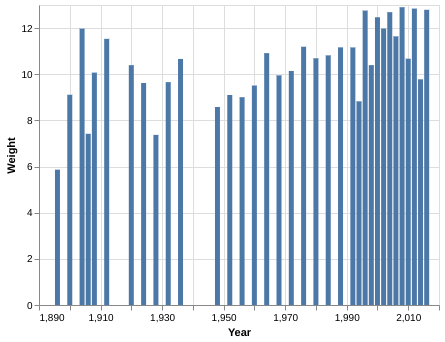

In [72]:
#data = data[(data.Medal == "Gold")]

std_by_year_sport = data.groupby(['Year','Sport'])['Height','Weight'].std() # .reset_index()

#print(std_by_year_sport)

avg_std_by_year = std_by_year_sport.groupby(['Year'])['Height','Weight'].mean().reset_index()

#print(avg_std_by_year)

avg_std_by_year_height = avg_std_by_year.drop(["Weight"],axis=1).reset_index()

#print(avg_std_by_year_height)





In [ ]:
# standard deviation of height across years

alt.Chart(avg_std_by_year).mark_bar().encode(
    x='Year',
    y='Height'
)

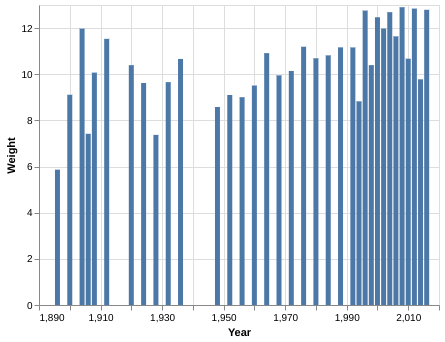

In [73]:
alt.Chart(avg_std_by_year).mark_bar().encode(
    x='Year',
    y='Weight'
)